In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Class names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Number of training examples: 60000
Number of test examples:     10000


In [21]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28,1)),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

model.fit(train_dataset, epochs=9, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/9
1875/1875 [==============================] - 2s 511us/step - loss: 0.2748 - accuracy: 0.9220
Epoch 2/9
1875/1875 [==============================] - 1s 520us/step - loss: 0.1227 - accuracy: 0.9644
Epoch 3/9
1875/1875 [==============================] - 1s 509us/step - loss: 0.0848 - accuracy: 0.9751
Epoch 4/9
1875/1875 [==============================] - 1s 525us/step - loss: 0.0617 - accuracy: 0.9815
Epoch 5/9
1875/1875 [==============================] - 1s 504us/step - loss: 0.0507 - accuracy: 0.9844
Epoch 6/9
1875/1875 [==============================] - 1s 497us/step - loss: 0.0400 - accuracy: 0.9880
Epoch 7/9
1875/1875 [==============================] - 1s 494us/step - loss: 0.0327 - accuracy: 0.9897
Epoch 8/9
1875/1875 [==============================] - 1s 496us/step - loss: 0.0269 - accuracy: 0.9919
Epoch 9/9
1875/1875 [==============================] - 1s 498us/step - loss: 0.0236 - accuracy: 0.9926


In [23]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 0s 567us/step - loss: 0.0735 - accuracy: 0.9795
Accuracy on test dataset: 0.9794999957084656


In [24]:
y_pred = np.argmax(model.predict(test_dataset), axis=1)
submission = pd.read_csv("./sample_submission.csv")
submission["Label"] = y_pred
submission.to_csv("./submission.csv", index=False)

313/313 [==============================] - 0s 298us/step


ValueError: Length of values (10000) does not match length of index (28000)

In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 22ms/step


In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

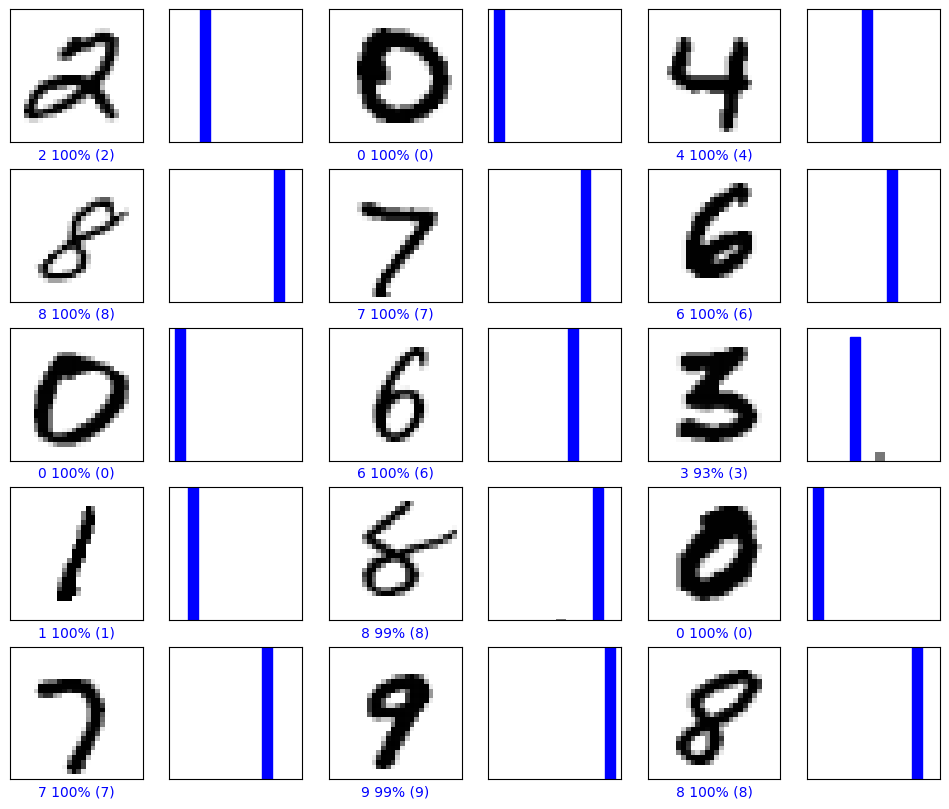

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
